## Basic creation of a ScanData object

**Note:**

geecs_data_utils makes use of GEECSPathConfig() which is loaded in the background. This looks for a specific config file which has details about the users desired defaults. If this config doesn't exist, some basic attributes need to be set.

In [1]:
from geecs_data_utils import ScanData

# if no config file exists, set base path to experiment data as below.
# Assumption is that data is stored like <base_path>/<experiment name>
# ScanPaths.paths_config.base_path = Path('Z:/data')

# Create ScanData object directly referencing year, month, data, scan number and experiment
sd = ScanData.from_date(year=2025, month=8, day=21, number=1, experiment="Undulator")

# inspect the head of the data_frame
sd.data_frame.head()

,Elapsed Time,Bin #,scan,U_ESP_JetXYZ Position.Axis 3 Alias:Jet_Z (mm),U_HP_Daq AnalogOutput.Channel 1 Alias:PressureControlVoltage,U_ModeImagerESP Position.Axis 2 Alias:JetBlade,U_BCaveICT acq_timestamp,U_BCaveICT Python Results.ChA Alias:U_BCaveICT Charge pC,UC_HiResMagCam acq_timestamp,Objective PlaceHolder,Shotnumber,UC_HiResMagCam:emittance_proxy,UC_HiResMagCam:total_counts,UC_HiResMagCam_expected_path,U_BCaveICT_expected_path
0,3.0,1,1,4.00051,2.0,-17.04999,3.838643e+09,176.458672,3.838643e+09,-2.657476,1,1000000.000000,19359560.0,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
1,4.0,1,1,4.00051,2.0,-17.04999,3.838643e+09,226.961340,3.838643e+09,-2.657476,2,0.522350,30597828.0,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
2,5.0,1,1,4.00051,2.0,-17.04999,3.838643e+09,185.923882,3.838643e+09,-2.657476,3,0.486896,27113014.0,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
3,6.0,1,1,4.00051,2.0,-17.04999,3.838643e+09,197.577382,3.838643e+09,-2.657476,4,0.527844,25153408.0,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
4,7.0,1,1,4.00051,2.0,-17.04999,3.838643e+09,173.117150,3.838643e+09,-2.657476,5,0.515521,25046332.0,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...


Note, in the above, the expected path of the saved device data (non scalar data) is directly appended to the data_frame. These are just the expected paths based on configuration etc. 

Search the data frame columns

In [2]:
sd.find_cols("charge")

['U_BCaveICT Python Results.ChA Alias:U_BCaveICT Charge pC']

## Working with binned data

binned_scalars is a property of the ScanData that can be accessed or used for plotting. There are number of attributes that are user defineable, like the aggretate type (i.e. 'agg') which can be mean or median. Also, there are a number of optitions for the error bar type. Default is to use mean and the inter quartile range error bars (same as GEECS Plotter default). See API for more details

There is also a basic plot utility for visualizing binned data in geecs_data_utils.plotting_utils

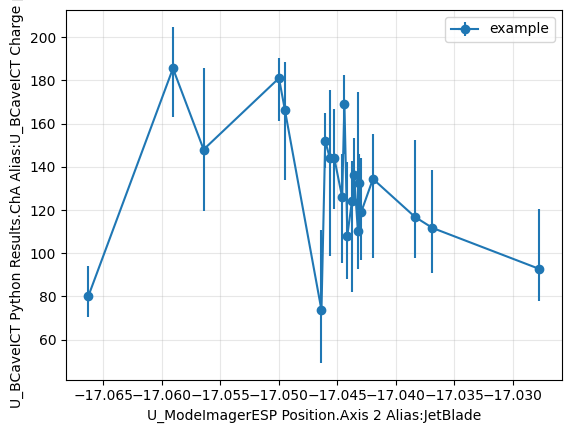

In [3]:
from geecs_data_utils.plotting_utils import plot_binned
import matplotlib.pyplot as plt


# If your s-file has "Bin" (not "Bin #"):
sd.set_binning_config(bin_col="Bin #")

binned = sd.binned_scalars
charge_col = sd.find_cols("charge")[0]

plot_binned(
    binned,
    x_col="U_ModeImagerESP Position.Axis 2 Alias:JetBlade",
    y_col=charge_col,
    label="example",
)

plt.show()

Reconfigure the binned data. Use 'charge' as the x axis with defined bin_width of 20. Change to mean and standard deviation

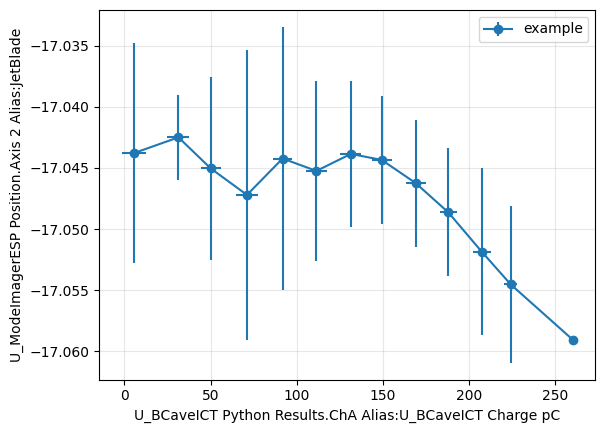

In [6]:
sd.set_binning_config(
    bin_col=charge_col, agg="mean", err="std", min_count=1, dropna="any", bin_width=20
)

bins1 = sd.binned_scalars  # triggers recompute

# Single series
plot_binned(
    bins1,
    x_col=charge_col,
    y_col="U_ModeImagerESP Position.Axis 2 Alias:JetBlade",
    label="example",
)
plt.show()

## Gather device data by shot number, verify existtence

Create dataframe of shotnumber and files paths for devices restricted to shotnumbers where all devices are saved

In [7]:
# make list of tuples with <device> <file_tail>. Note, file names are typically:
# Scan<scan_number>DeviceName<shotnumber><extra><extenstion>. Here file_tail represents
# everything after <shotnumber>. For example, for magspec type device, could be ('magspec', 'interpSpec.txt')

sd = ScanData.from_date(year=2025, month=8, day=7, number=5, experiment="Undulator")

dev_list = [
    ("Z_Test_Scope", ".dat"),
    ("Z_Test_Scope_2", ".dat"),
    ("UC_ALineEBeam3", ".png"),
]
shots = sd.paths.get_common_shot_dataframe(dev_list)
shots.head(5)

,shot_number,Z_Test_Scope,Z_Test_Scope_2,UC_ALineEBeam3
0,1,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
1,2,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
2,3,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
3,4,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
4,5,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...,/Volumes/hdna2/data/Undulator/Y2025/08-Aug/25_...
